<a href="https://colab.research.google.com/github/softglance/ml/blob/master/M2_Decision_Tree_Classifier_%26_Random_Forest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
tree = DecisionTreeClassifier(random_state=100)
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=100)

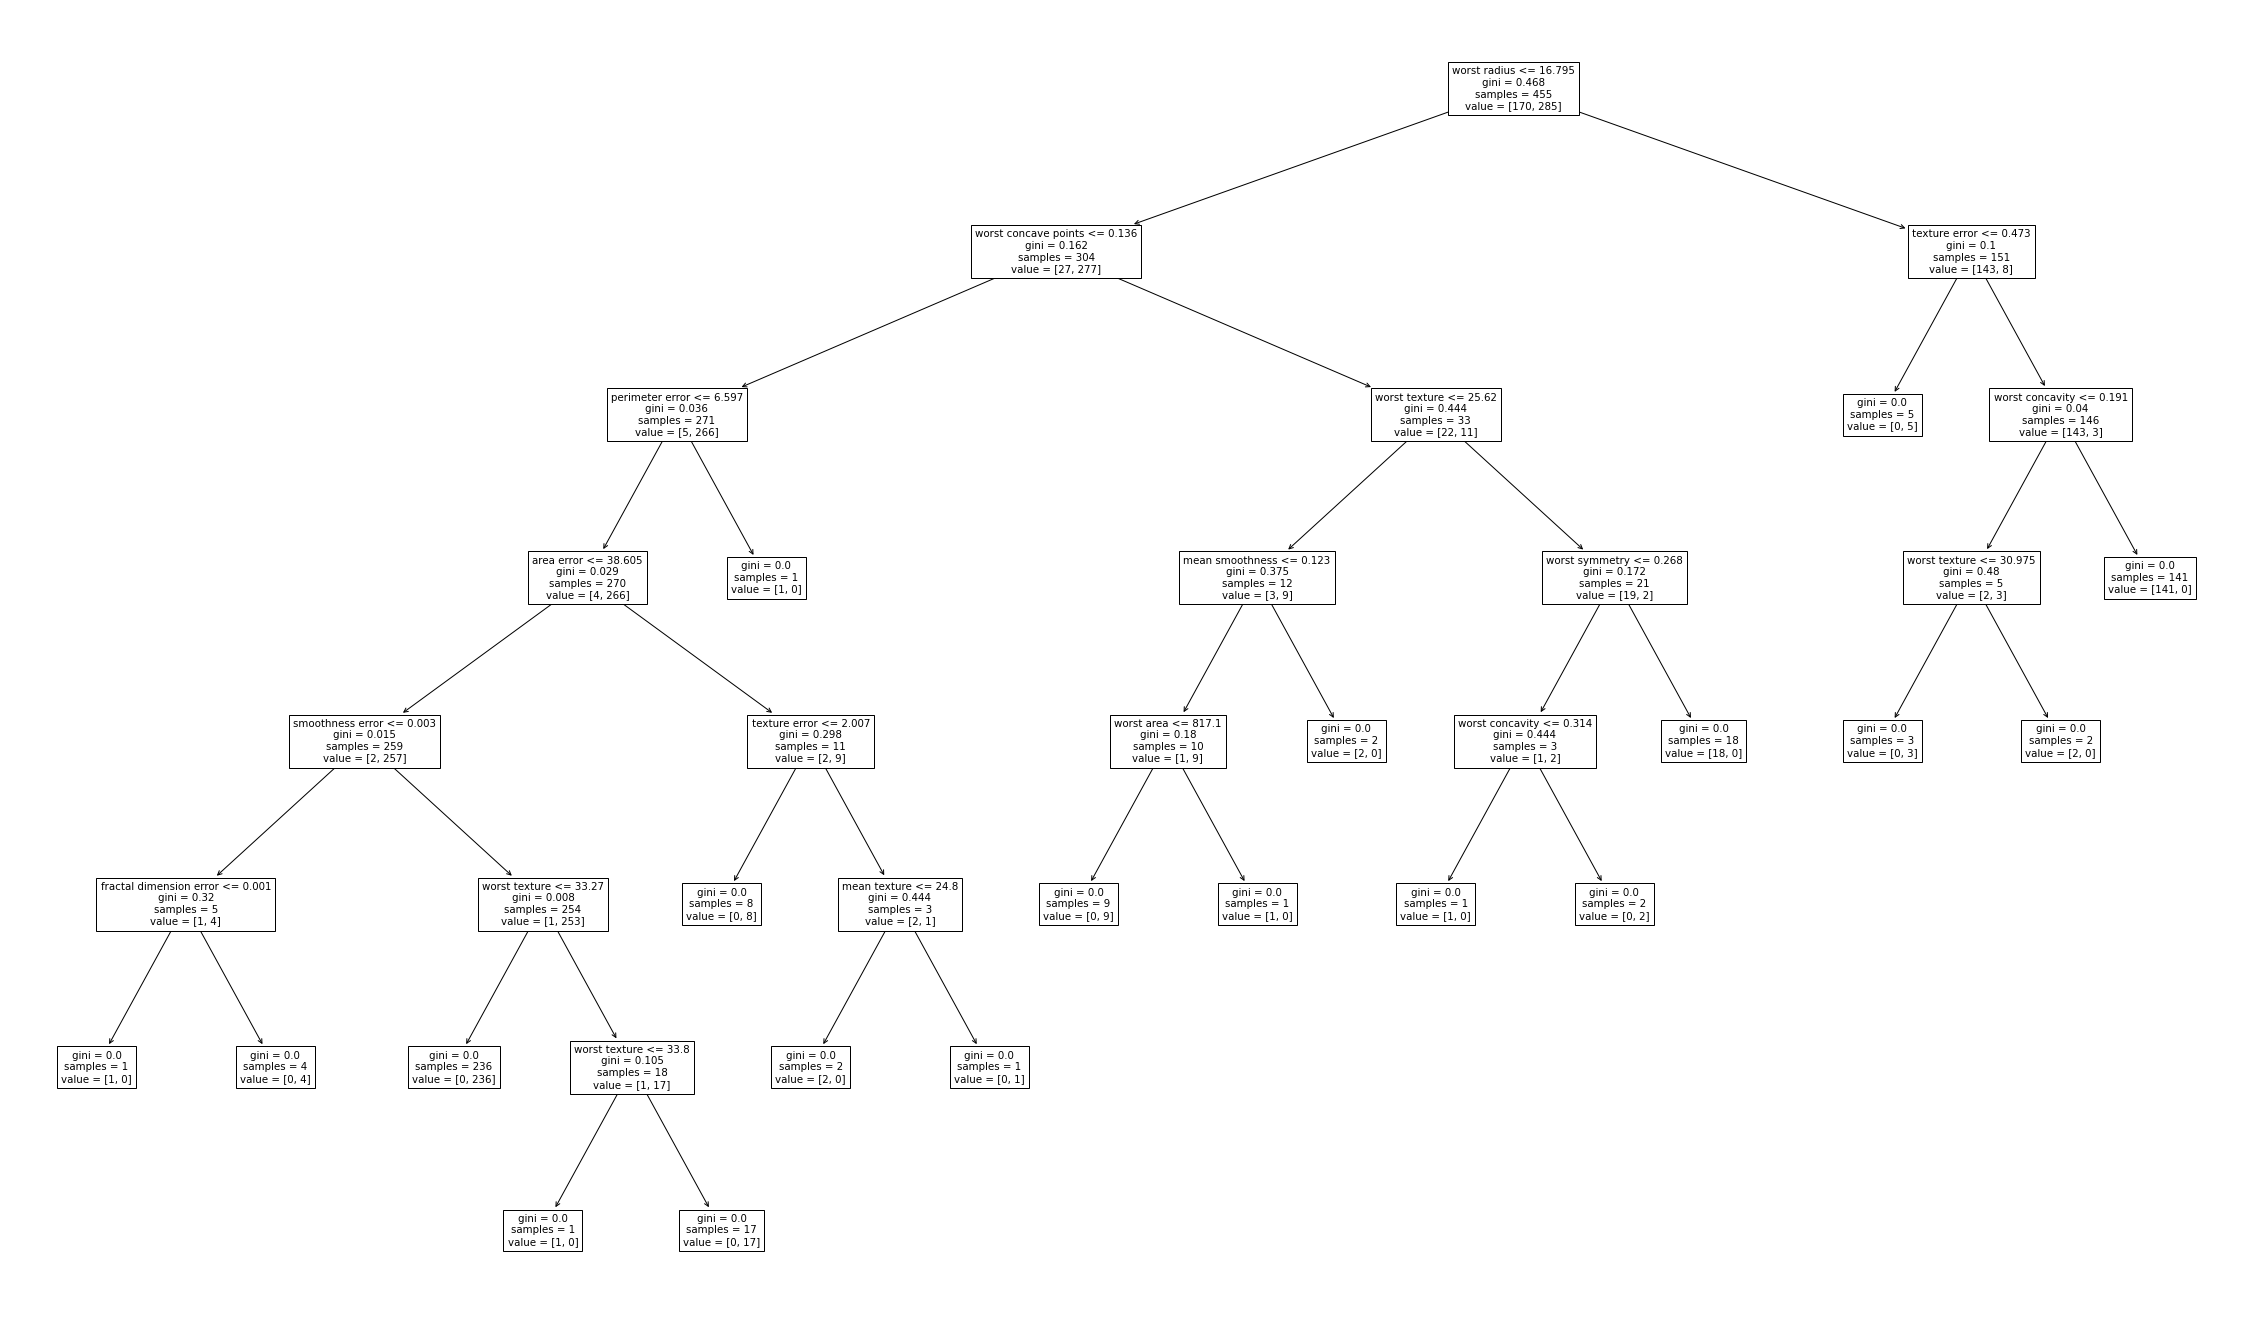

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40,24))
plot_tree(tree,feature_names= cancer.feature_names)
plt.show()

In [ ]:
tree.get_depth()

7

In [ ]:
predictions = tree.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.9122807017543859

# Max Depth

In [ ]:
tree = DecisionTreeClassifier(random_state=100,max_depth=3)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=100)

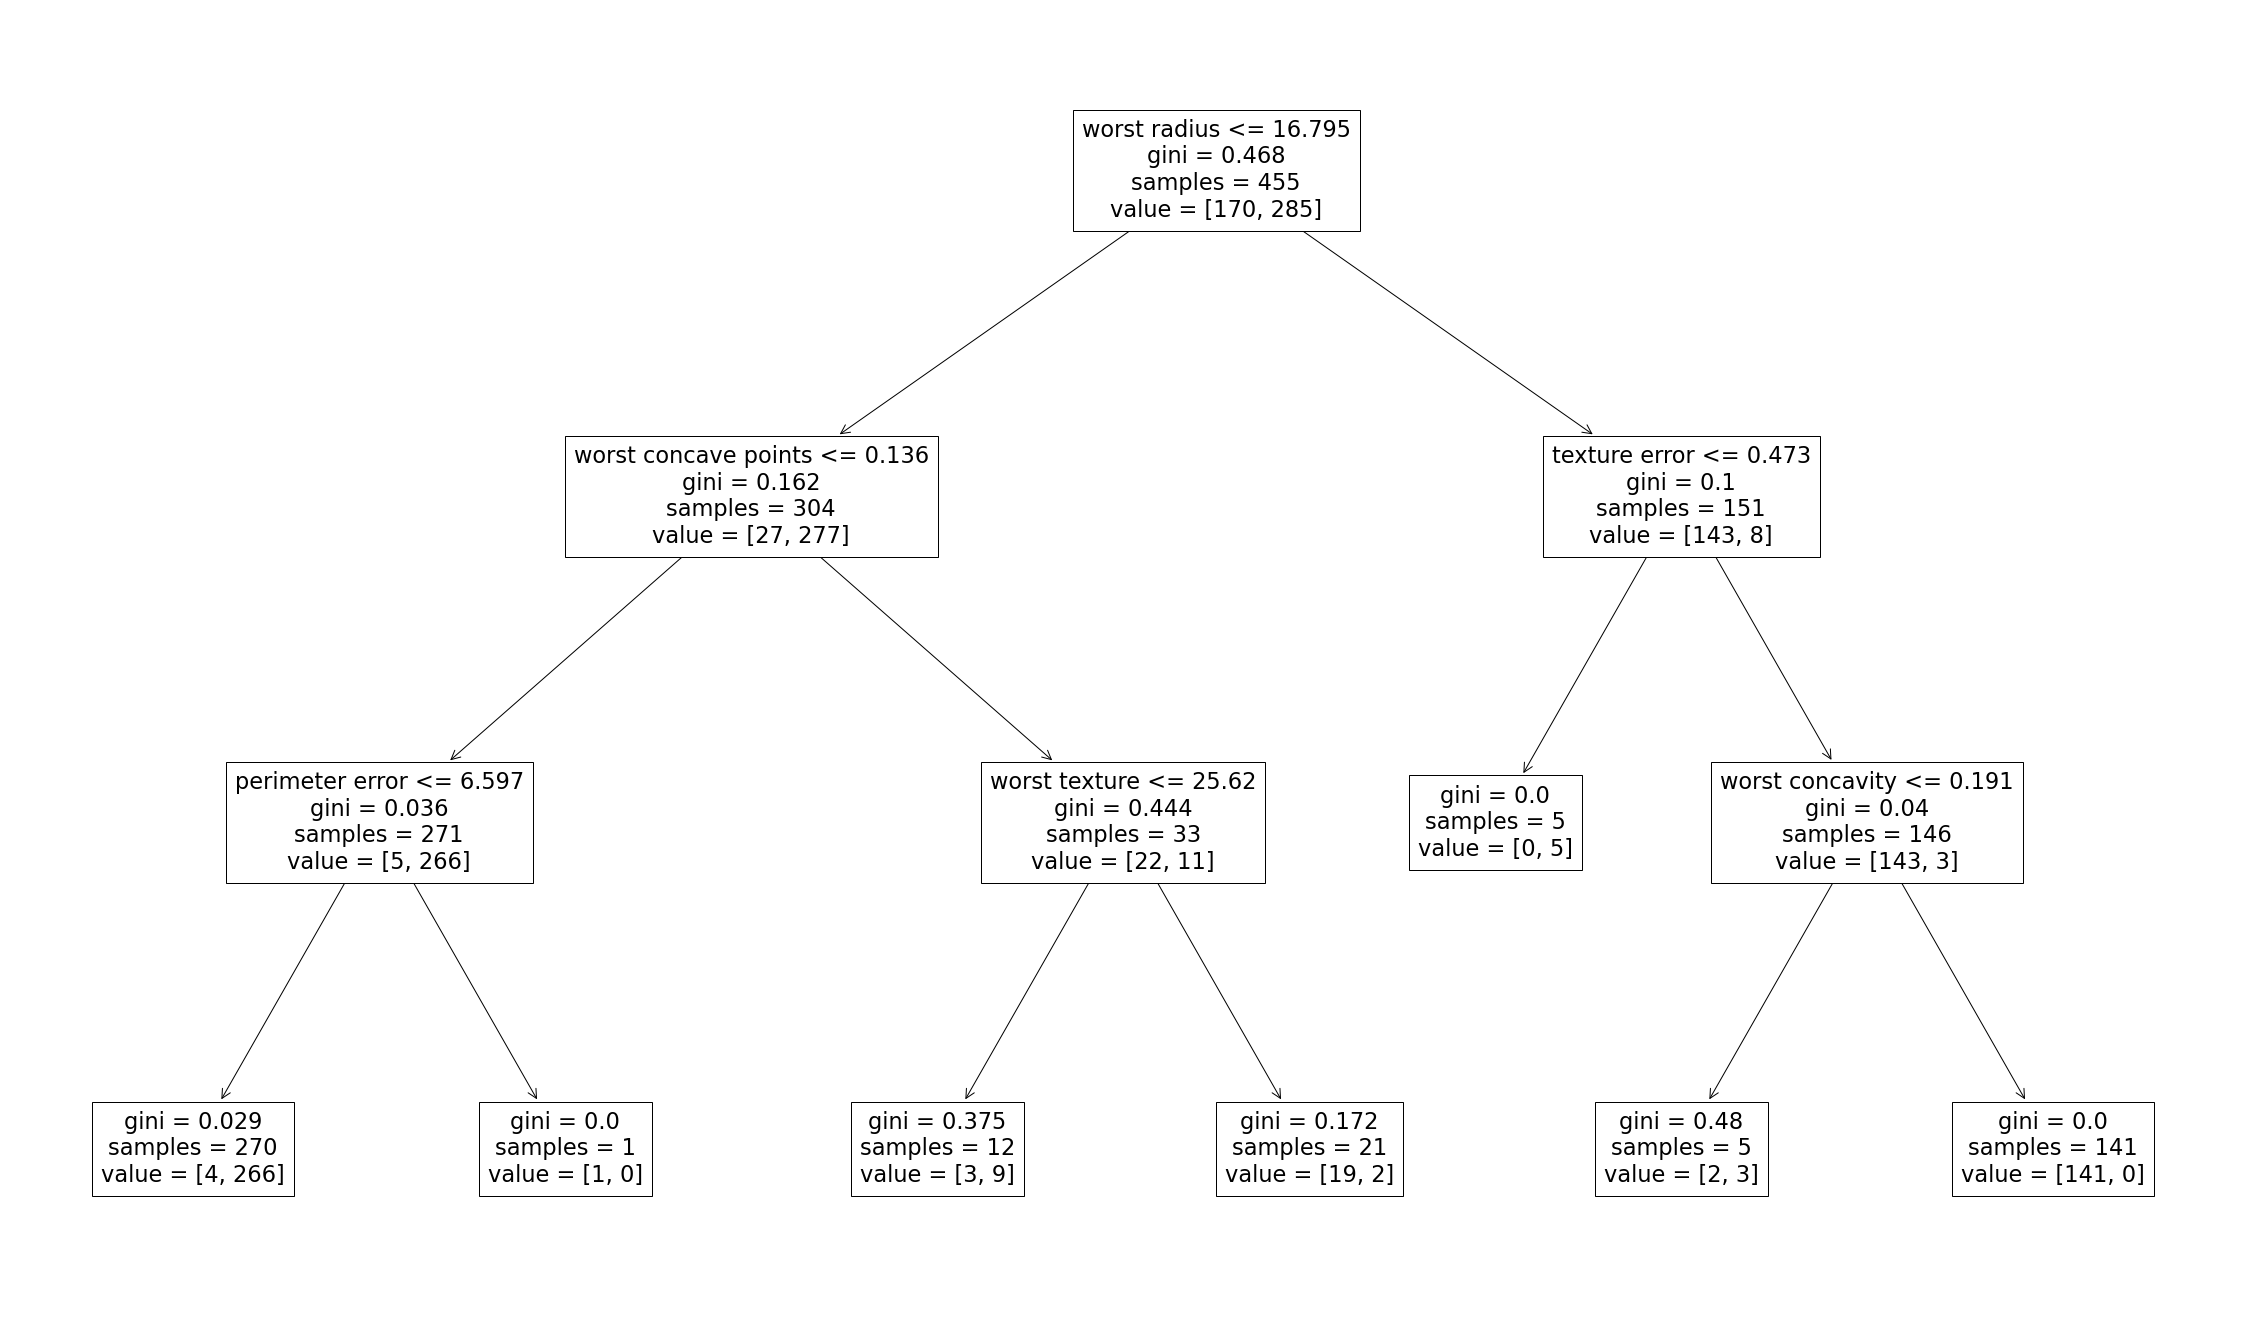

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40,24))
plot_tree(tree,feature_names= cancer.feature_names)
plt.show()

In [ ]:
predictions = tree.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.9385964912280702

In [ ]:
pd.Series(y_train).value_counts()

1    285
0    170
dtype: int64

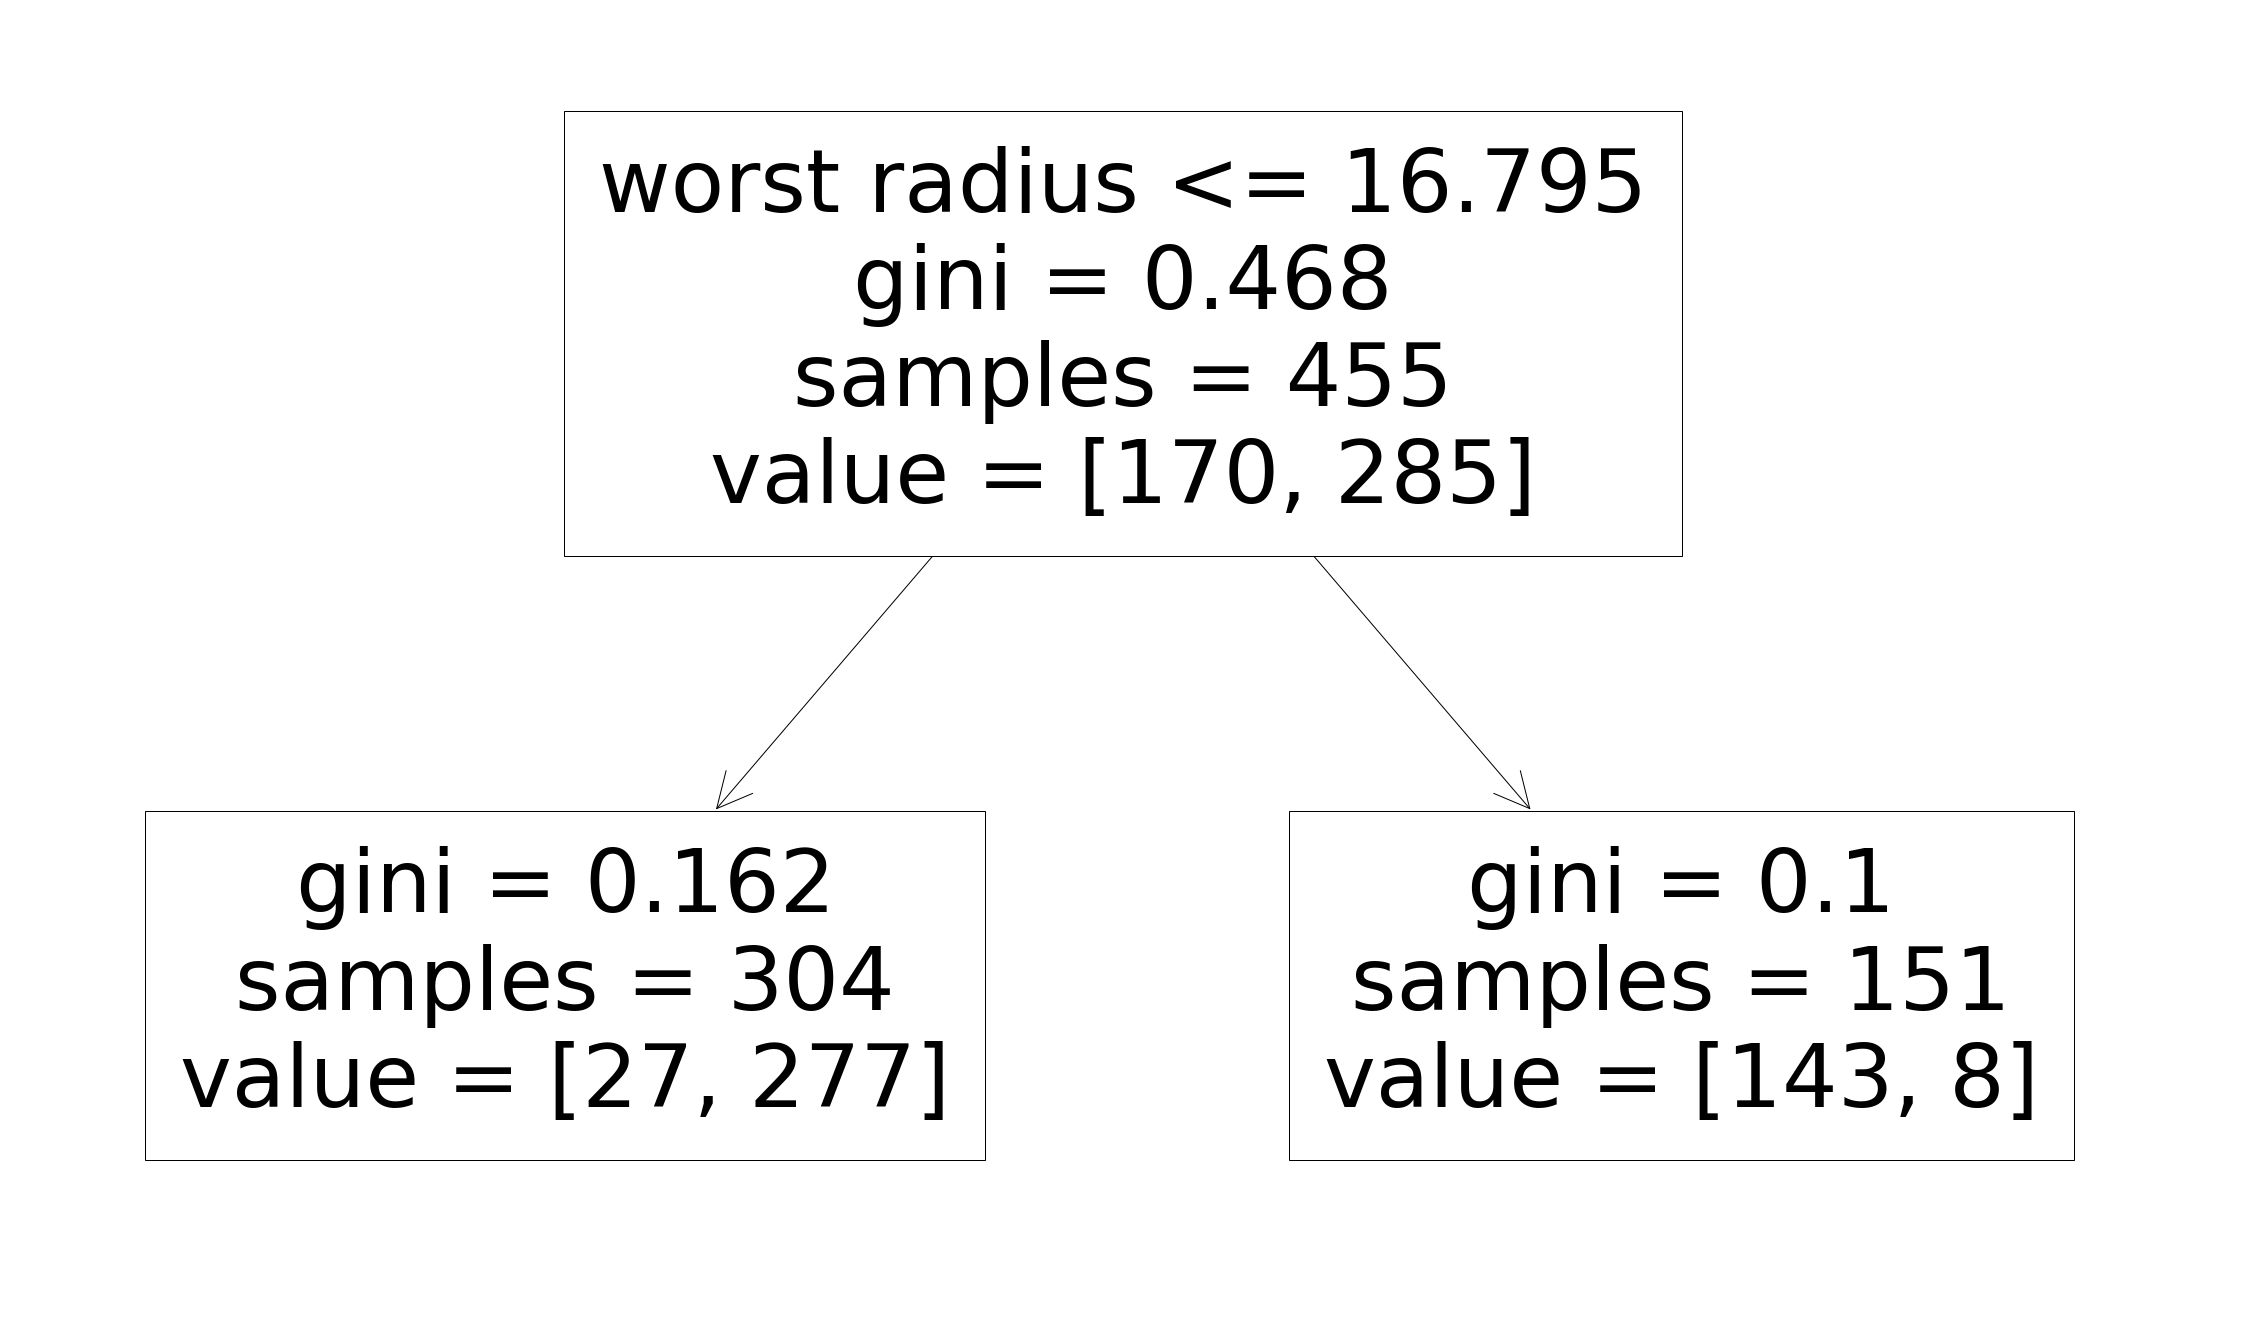

0.9210526315789473

In [ ]:
tree = DecisionTreeClassifier(random_state=100,max_depth=1)
tree.fit(X_train,y_train)
plt.figure(figsize=(40,24))
plot_tree(tree,feature_names= cancer.feature_names)
plt.show()
predictions = tree.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

# Splitting Criteria

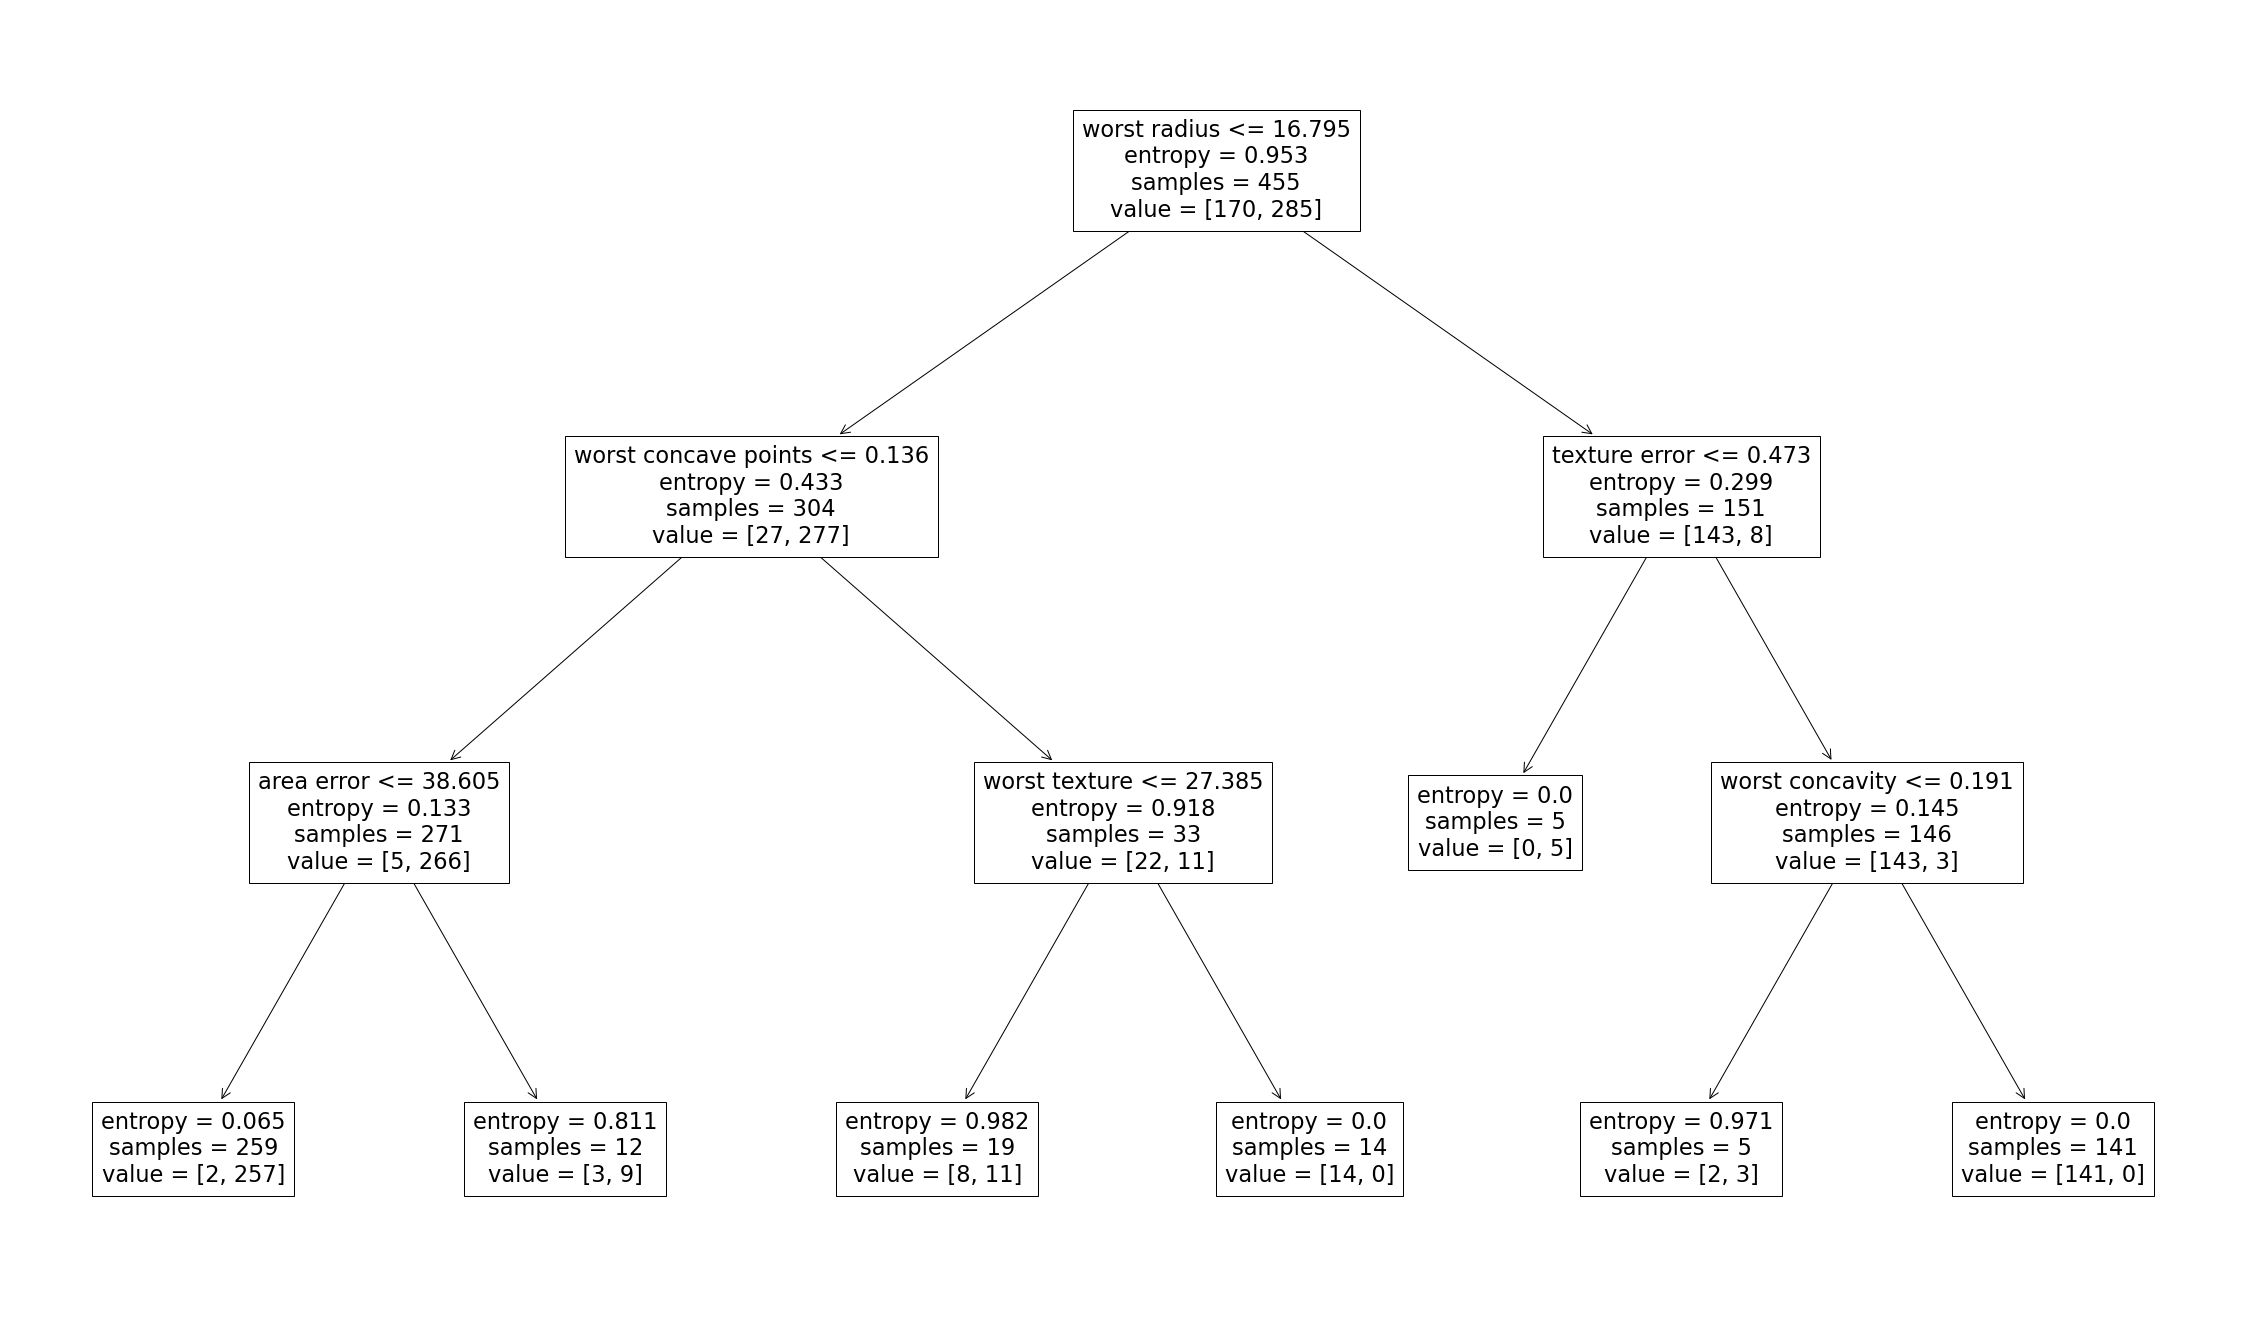

Accuracy of the model is : 0.9473684210526315


In [ ]:
tree_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state=100, max_depth=3)
tree_entropy.fit(X_train,y_train)

plt.figure(figsize=(40,24))
plot_tree(tree_entropy,feature_names= cancer.feature_names)
plt.show()

predictions = tree_entropy.predict(X_test)
print("Accuracy of the model is :", accuracy_score(y_test,predictions))

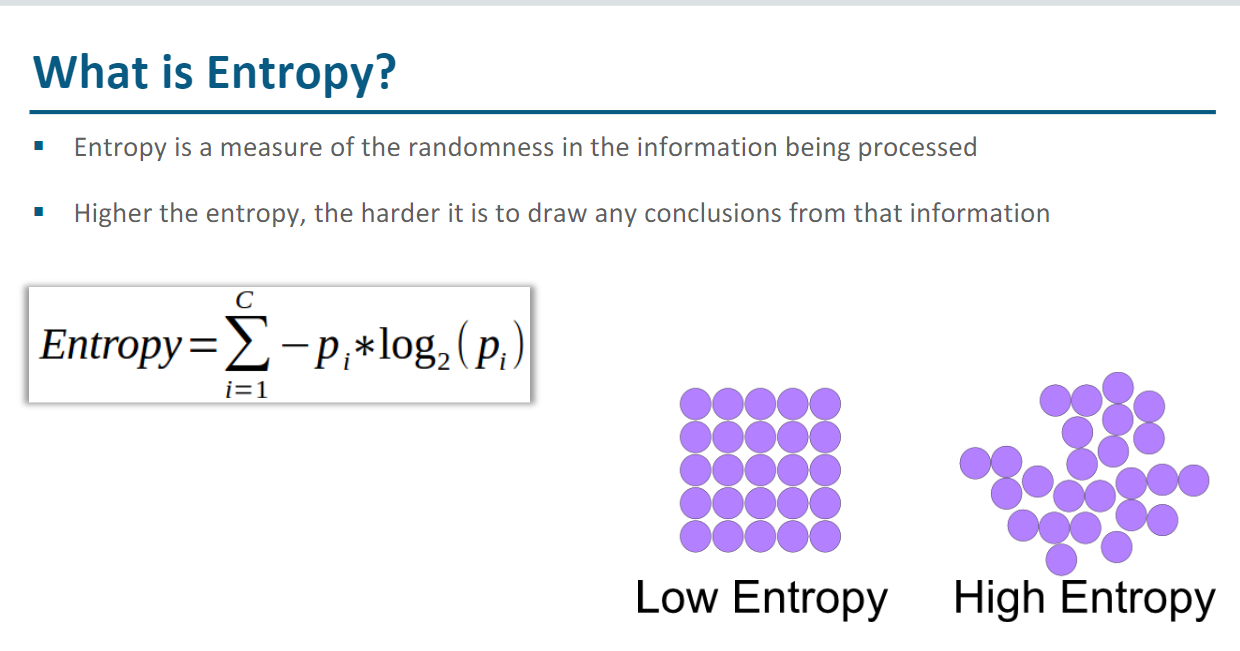

# Feature Importances

In [ ]:
tree_entropy.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.06266038, 0.        , 0.02425247, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.67036537, 0.03035815, 0.        , 0.        , 0.        ,
       0.        , 0.04233851, 0.17002512, 0.        , 0.        ])

In [ ]:
imp = pd.DataFrame()
imp['feature'] = cancer.feature_names
imp['importance'] = tree_entropy.feature_importances_
imp.sort_values('importance',ascending=False) # Feature Selection

,feature,importance
20,worst radius,0.670365
27,worst concave points,0.170025
11,texture error,0.062660
26,worst concavity,0.042339
21,worst texture,0.030358
13,area error,0.024252
0,mean radius,0.000000
16,concavity error,0.000000
28,worst symmetry,0.000000
25,worst compactness,0.000000


In [ ]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'criterion':['gini','entropy'],
          'max_depth':range(2,10),
          'splitter':['best','random']}

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=100)

grid_cv = GridSearchCV(estimator=tree_clf, param_grid = params, 
                       cv=5, scoring='accuracy',verbose=1)

In [ ]:
grid_cv.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [ ]:
grid_cv.best_estimator_ # Model instance

DecisionTreeClassifier(max_depth=5, random_state=100)

In [ ]:
grid_cv.best_params_

{'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}

In [ ]:
grid_cv.best_score_

0.9428571428571428

## Random Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random = RandomizedSearchCV(estimator = tree_clf, param_distributions=params,
                            cv=5, scoring='accuracy')

In [ ]:
random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 10),
                                        'splitter': ['best', 'random']},
                   scoring='accuracy')

In [ ]:
random.best_estimator_ # Model instance

DecisionTreeClassifier(max_depth=8, random_state=100)

In [ ]:
random.best_score_

0.9318681318681319

In [ ]:
random.best_params_

{'criterion': 'gini', 'max_depth': 8, 'splitter': 'best'}

## Practice Assignment

In [ ]:
from sklearn.datasets import load_wine
wine = load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
df.head(25)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


In [ ]:
"""
Tasks : 
1. Separate input and output . Treat the target as output
2. Split into two parts - 80:20
3. Perform the fit, and evaluate (accuracy) on test data using the below models:
- Logistic Regression
- Decision Tree


Hyper parameter tuning: (Use both RandomSearchCV & GridSearchCV, with cv=4 , scoring='accuracy')
- Decision Tree - criterion - {“gini”, “entropy”, “log_loss”}, splitter{“best”, “random”}, max_depth: range(2,10)
"""

# Random Forest Algorithm

In [ ]:
x = list("abcdefghijklmnopqrstuvwxyz")
x

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [ ]:
import random

In [ ]:
for choice in random.choices(x,k=3): # sample selection wtih replacement
  print(choice)

q
m
d


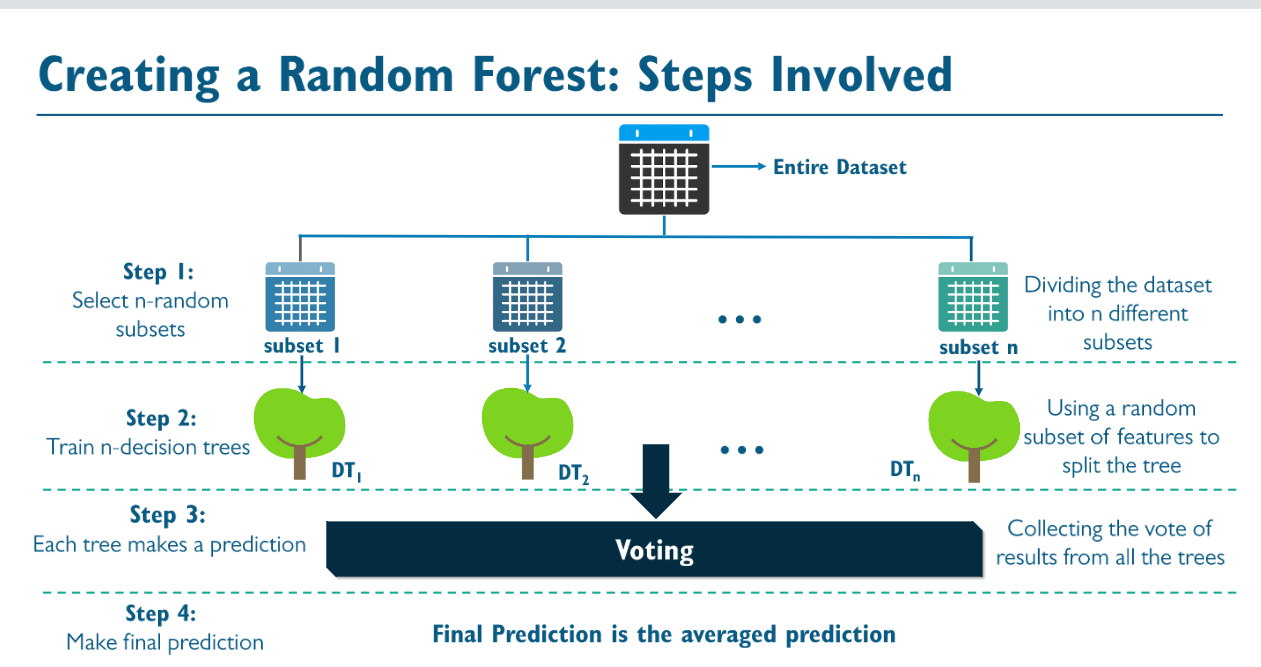

In [ ]:
# Bootstrapping
X = wine.data
y = wine.target

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=200,
                            criterion='entropy')

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [ ]:
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [ ]:
params = {'criterion':['gini','entropy'],
          'n_estimators':[100,200,300,400],
          'max_depth': range(3,10)}

In [ ]:
grid = GridSearchCV(estimator=RandomForestClassifier(random_state=100),
                    param_grid = params)

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=100),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 10),
                         'n_estimators': [100, 200, 300, 400]})

In [ ]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 200}

In [ ]:
grid.best_score_

0.9859605911330049

In [ ]:
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=10), n_estimators=200, max_features=0.7, 
                        verbose=1)

In [ ]:
bag.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished


BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=10),
                  max_features=0.7, n_estimators=200, verbose=1)

In [ ]:
bag.estimators_

In [ ]:
bag.score(X_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


0.9722222222222222

In [ ]:
bag.get_params()

{'base_estimator': DecisionTreeClassifier(random_state=10),
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': 10,
 'base_estimator__splitter': 'best',
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 0.7,
 'max_samples': 1.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 1,
 'warm_start': False}

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
bag = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=200, max_features=0.7, 
                        verbose=1)

In [ ]:
bag.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 

BaggingClassifier(base_estimator=LogisticRegression(), max_features=0.7,
                  n_estimators=200, verbose=1)

In [ ]:
bag.score(X_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


1.0

In [ ]:
pd.Series(y).value_counts(normalize=True)

1    0.398876
0    0.331461
2    0.269663
dtype: float64

In [ ]:
# 90 - valid
# 10 - invalid

# Evaluation Metrics

- Balanced Data --> Accuracy (From output : class1:50% , class2:50%)
- Imbalanced Data --> f1_score/roc_auc_score (only in binary classification) is preferred . (From output class distribution - Class1:95%, class2:5%)

```python
from sklearn.metrics import classification_report
```

# Evaluation Metrics

In [ ]:
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data = pd.read_csv(url)
data.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [ ]:
X = data.drop(columns='default')
y = data['default']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=6)

log = LogisticRegression()

log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
log.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred_proba = log.predict_proba(X_test)

In [ ]:
y_pred_proba[:5]

array([[9.57224822e-01, 4.27751776e-02],
       [9.76894680e-01, 2.31053203e-02],
       [9.99881484e-01, 1.18515659e-04],
       [9.93128791e-01, 6.87120859e-03],
       [9.75456233e-01, 2.45437672e-02]])

In [ ]:
#Class 1
y_pred_proba = y_pred_proba[:,1]

In [ ]:
y_pred_proba[:5]

array([0.04277518, 0.02310532, 0.00011852, 0.00687121, 0.02454377])

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)

In [ ]:
thresholds[:5]

array([1.91560333, 0.91560333, 0.84438986, 0.81986857, 0.78399064])

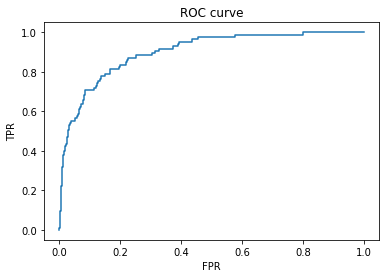

In [ ]:
plt.plot(fpr,tpr) # ROC curve
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [ ]:
y.value_counts(normalize=True) # Imbalanced

0    0.9667
1    0.0333
Name: default, dtype: float64

In [ ]:
y.value_counts(normalize=False) # Imbalanced

0    9667
1     333
Name: default, dtype: int64

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.9005675313603704

In [ ]:
y_pred = log.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2415
           1       0.54      0.22      0.32        85

    accuracy                           0.97      2500
   macro avg       0.76      0.61      0.65      2500
weighted avg       0.96      0.97      0.96      2500



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[2399,   16],
       [  66,   19]])

In [ ]:
#2399 - True Negatives
# 66 - False Negatives
# 19 - True Positive
# 16 - False Positive

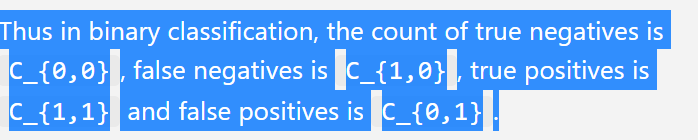

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.3166666666666667

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)

0.5428571428571428

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.2235294117647059

## Suggested Activity

Solve the Problem Statement - 1,2,3 from the pdf workbook shared in LMS

In [ ]:
# Smote Algorithm